# Practice on binary classification metrics

This notebook is a short practice and review about metrics related to binary classification

## Confusion Matrix (Binary Classification)

|                | Predicted 1 | Predicted 0 |
|----------------|------------|-------------|
| **Actual 1**   | TP (True Positive) | FN (False Negative) |
| **Actual 0**   | FP (False Positive) | TN (True Negative) |

**TP**: actual 1, predicted 1  
**FP**: actual 0, predicted 1  
**FN**: actual 1, predicted 0  
**TN**: actual 0, predicted 0  

All classification metrics (accuracy, precision, recall, F1, etc.) are derived from these four values.


### Simple example data

In [2]:
import numpy as np

targets =     np.array([1,1,1,1,1,0,0,0,0,0])
predictions = np.array([1,1,1,0,0,0,0,0,0,1])

In [3]:
# sklearn methods
from sklearn.metrics import confusion_matrix, accuracy_score

display(confusion_matrix(targets, predictions, normalize='true'))
display(accuracy_score(targets, predictions))

array([[0.8, 0.2],
       [0.4, 0.6]])

0.7

In [4]:
# same custom methods
from mlpeople.models.logistic import (
    accuracy as accuracy_score_2,
    confusion_matrix as confusion_matrix_2,
    plot_confusion_matrix,
)

display(confusion_matrix_2(targets, predictions, normalize='true', decimals=2))
display(accuracy_score_2(targets, predictions))

{'TP': np.float64(0.6),
 'FN': np.float64(0.4),
 'FP': np.float64(0.2),
 'TN': np.float64(0.8)}

np.float64(0.7)

### Confusion matrix heatmap vizualiztion samples

{'TP': np.int64(3), 'FP': np.int64(1), 'FN': np.int64(2), 'TN': np.int64(4)}

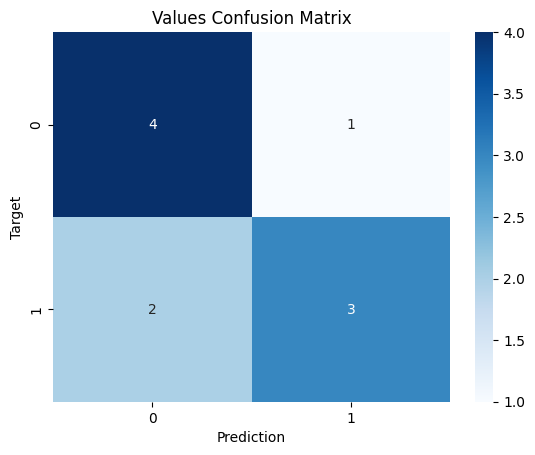

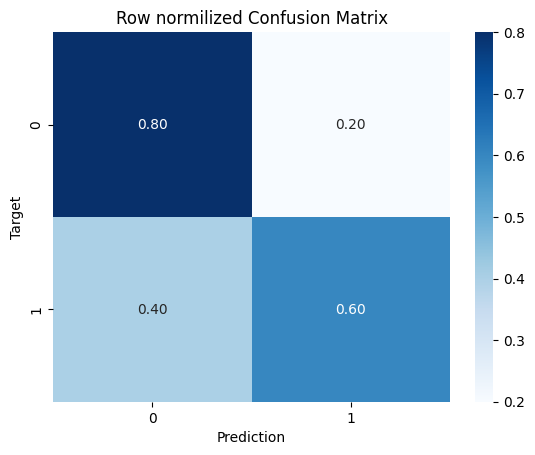

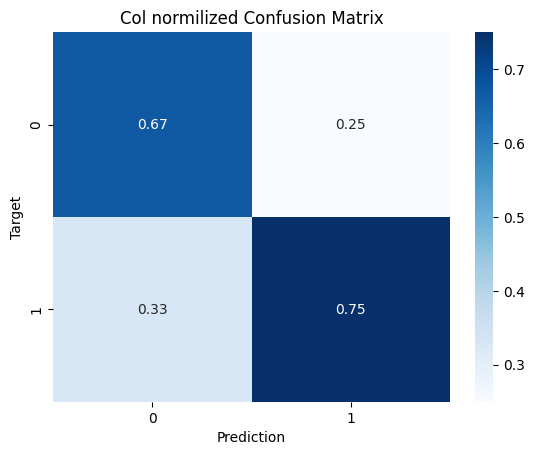

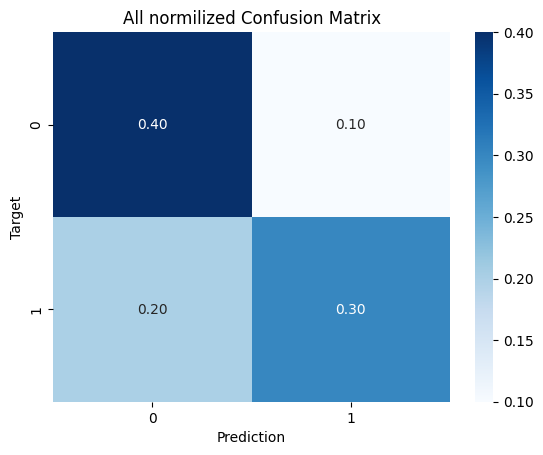

In [5]:
display(confusion_matrix_2(targets, predictions, normalize=None))
plot_confusion_matrix(targets, predictions, normalize=None, name='Values')
plot_confusion_matrix(targets, predictions, normalize='true', name='Row normilized')
plot_confusion_matrix(targets, predictions, normalize='pred', name='Col normilized')
plot_confusion_matrix(targets, predictions, normalize='all', name='All normilized')

### Precision

**Definition:**  
Fraction of positive predictions that are correct.
| True \ Pred | 0 | 1 |
|------------|---|---|
| **0**      | TN | FP |
| **1**      | FN | TP |

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Interpretation:**  
> "When the model predicts positive, how often is it right?"

- **High precision** → few false positives
- **Low precision** → many false positives


In [6]:
from sklearn.metrics import precision_score
from mlpeople.models.logistic import precision

display(precision_score(targets, predictions))
display(precision(targets, predictions).round(2))

0.75

np.float64(0.75)

### Recall (Sensitivity / True Positive Rate)

**Definition:**  
Fraction of actual positives that are correctly identified.
| True \ Pred | 0 | 1 |
|------------|---|---|
| **0**      | TN | FP |
| **1**      | FN | TP |

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Interpretation:**  
> "Of all the actual positives, how many did the model find?"

- **High recall** → few false negatives
- **Low recall** → many false negatives


In [7]:
from sklearn.metrics import recall_score
from mlpeople.models.logistic import recall

display(recall_score(targets, predictions))
display(recall(targets, predictions).round(2))

0.6

np.float64(0.6)

### F1 Score

**Definition:**  
Harmonic mean of precision and recall. Balances false positives and false negatives.

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Interpretation:**  
> "Single metric that is high only if both precision and recall are high"

- **High F1** → model is accurate and finds most positives
- **Low F1** → either many false positives or many false negatives


In [8]:
from sklearn.metrics import f1_score
from mlpeople.models.logistic import f1_score as f1_score_2

display(f1_score(targets, predictions))
display(f1_score_2(targets, predictions).round(2))

0.6666666666666666

np.float64(0.67)

### Additional Metrics from Confusion Matrix

**Binary confusion matrix reminder:**

| True \ Pred | 0 | 1 |
|------------|---|---|
| **0**      | TN | FP |
| **1**      | FN | TP |

---

#### True Negative Rate (TNR) / Specificity
Fraction of actual negatives correctly identified.

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

- High specificity → few false positives.
- Useful when false alarms are costly (e.g., medical tests).

---

#### False Positive Rate (FPR)
Fraction of actual negatives misclassified as positives.

$$
\text{FPR} = \frac{FP}{FP + TN} = 1 - \text{Specificity}
$$

- Used in ROC curves.

---

#### False Negative Rate (FNR)
Fraction of actual positives misclassified as negatives.

$$
\text{FNR} = \frac{FN}{FN + TP} = 1 - \text{Recall}
$$

- Important when missing positives is costly (e.g., disease detection).

---

#### Balanced Accuracy
Average of sensitivity (recall) and specificity. Useful for imbalanced datasets.

$$
\text{Balanced Accuracy} = \frac{\text{Recall} + \text{Specificity}}{2}
$$

---

#### F-beta Score

**Definition:**  
Generalization of the F1 score that allows weighting recall and precision differently.

$$
F_\beta = (1 + \beta^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{(\beta^2 \cdot \text{Precision}) + \text{Recall}}
$$

**Interpretation:**  
- **β = 1** → F1 score (precision and recall are equally weighted)  
- **β > 1** → recall is more important than precision  
- **β < 1** → precision is more important than recall

**Example:**  

- Precision = 0.8, Recall = 0.5  
- F1 (β=1) = 0.62  
- F2 (β=2) = 0.53 → more weight on recall  
- F0.5 (β=0.5) = 0.71 → more weight on precision


### Few Real World Examples

In [9]:
import numpy as np
from mlpeople.models.logistic.metrics import accuracy, precision, recall, f1_score

# Example 1 — Imbalanced classes
y_true_1 = np.array([1]*10 + [0]*90)       # 10 positives, 90 negatives
y_pred_1 = np.zeros(100)                   # Model predicts all 0

print("Example 1 — Imbalanced classes")
print("Accuracy:", accuracy(y_true_1, y_pred_1))
print("Precision:", precision(y_true_1, y_pred_1))
print("Recall:", recall(y_true_1, y_pred_1))
print("F1:", f1_score(y_true_1, y_pred_1))
print("-"*40)

# Example 2 — False positives matter (spam detection)
y_true_2 = np.array([0]*950 + [1]*50)     # 50 spam, 950 not spam
y_pred_2 = np.array([1]*70 + [0]*900 + [1]*30)   # Model predicts 100 positives, includes 30 of the actual positives - 70 FP from negatives, 30 TP from positives


print("Example 2 — False positives matter (spam detection)")
print("Accuracy:", accuracy(y_true_2, y_pred_2))
print("Precision:", precision(y_true_2, y_pred_2))
print("Recall:", recall(y_true_2, y_pred_2))
print("F1:", f1_score(y_true_2, y_pred_2).round(2))
print("-"*40)

# Example 3 — Rare disease detection
y_true_3 = np.array([0]*9950 + [1]*50)    # 50 patients out of 10000
y_pred_3 = np.array([0]*9900 + [1]*100)   # Model predicts 100 positives, includes all 50 patients

print("Example 3 — Rare disease detection")
print("Accuracy:", accuracy(y_true_3, y_pred_3))
print("Precision:", precision(y_true_3, y_pred_3))
print("Recall:", recall(y_true_3, y_pred_3))
print("F1:", f1_score(y_true_3, y_pred_3).round(2))


Example 1 — Imbalanced classes
Accuracy: 0.9
Precision: 0.0
Recall: 0.0
F1: 0.0
----------------------------------------
Example 2 — False positives matter (spam detection)
Accuracy: 0.91
Precision: 0.3
Recall: 0.6
F1: 0.4
----------------------------------------
Example 3 — Rare disease detection
Accuracy: 0.995
Precision: 0.5
Recall: 1.0
F1: 0.67


## ROC Curve / AUROC

In [10]:
preds = np.array([0.1, 0.2, 0.6, 0.4, 0.8, 0.9, 0.9, 0.8])
targs = np.array([0,   0,   1,   1,   0,   1,   1,   1])


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

from mlpeople.models.evaluation import plot_roc

### Example 1 — Perfect predictions

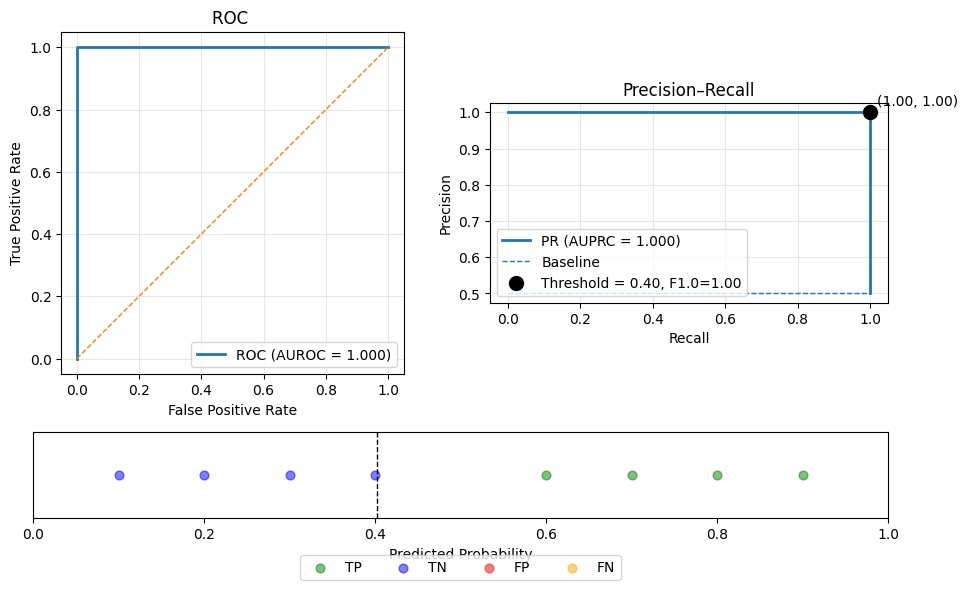

In [12]:
# True labels
y_true_1 = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Model predicts perfectly
probs_1 = np.array([0.1, 0.2, 0.3, 0.4, 0.9, 0.8, 0.7, 0.6])

plot_roc(probs_1, y_true_1, show_probabilities=True, show_pr_curve=True);

### Example 2 — All predictions are 0.5 (random)

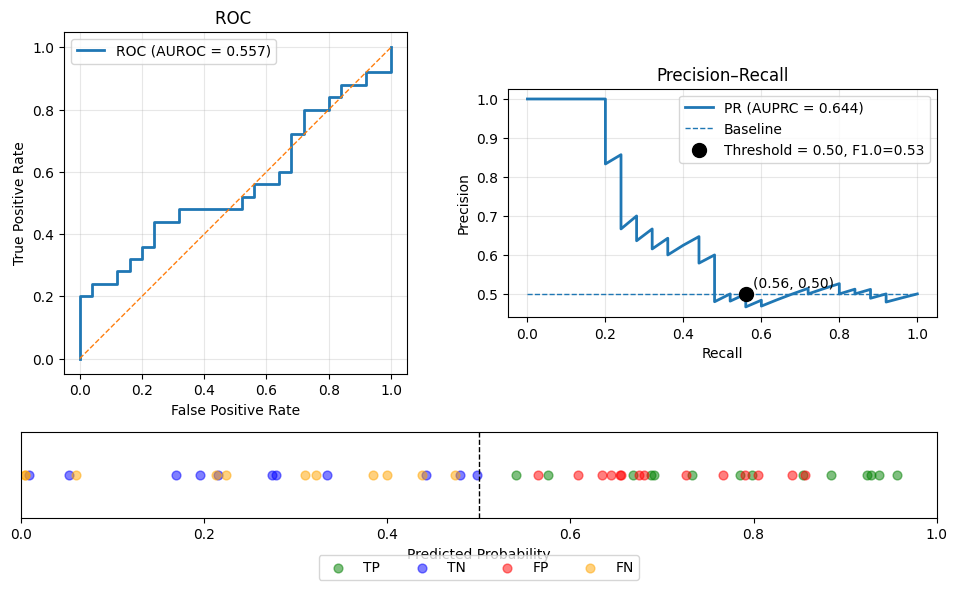

In [13]:
np.random.seed(79)

# Generate targets: 25 zeros and 25 ones
y_true_2 = np.array([0]*25 + [1]*25)

# Shuffle them so they are not ordered
np.random.shuffle(y_true_2)

# Generate random predicted probabilities between 0 and 1
probs_2 = np.random.rand(50)

plot_roc(probs_2, y_true_2, show_probabilities=True, show_pr_curve=True, threshold=0.5);

### Example 3 — Skewed probabilities (imbalanced classes)

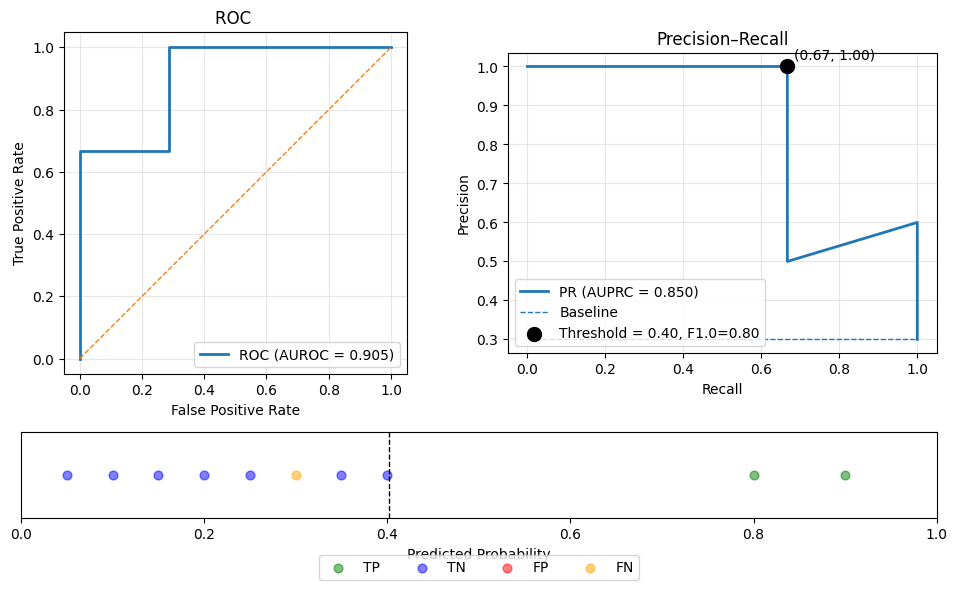

In [14]:
y_true_3 = np.array([1]*3 + [0]*7)  # 2 positives, 8 negatives
probs_3 = np.array([0.9, 0.8, 0.3, 0.2, 0.35, 0.25, 0.4, 0.15, 0.05, 0.1])

plot_roc(probs_3, y_true_3, show_probabilities=True, show_pr_curve=True);

### Example 4 — False positives matter (spam detection)

We have a small synthetic dataset simulating a spam detection scenario:

- `y_true_4` contains **5 negatives (legitimate emails)** and **5 positives (spam emails)**
- `probs_4` contains predicted probabilities for each email being spam
- Some positives have **lower probabilities than some negatives**, creating a realistic scenario where the model is not perfect

---

#### Default F1 threshold (β = 1)

- Auto-selected threshold **maximizes F1 score**
- In this case, it chooses **threshold = 0**

**Confusion matrix at threshold = 0:**

|       | Pred = 0 | Pred = 1 |
|-------|----------|----------|
| True=0 | 0        | 5        |
| True=1 | 0        | 5        |

- **TP = 5, FP = 5, FN = 0, TN = 0**
- **Precision = 0.5, Recall = 1.0, F1 ≈ 0.667**

**Observation:** Although this maximizes the F1 score numerically, it is impractical for spam detection because **all legitimate emails are incorrectly flagged as spam**.

---

#### Precision-favoring threshold (β = 0.5)

- Auto-selected threshold now **favors precision over recall**
- Threshold = **0.63**, which reduces false positives

**Confusion matrix at threshold = 0.63:**

|       | Pred = 0 | Pred = 1 |
|-------|----------|----------|
| True=0 | 5        | 0        |
| True=1 | 3        | 2        |

- **TP = 2, FP = 0, FN = 3, TN = 5**
- **Precision ≈ 1, Recall ≈ 0.4, F0.5 ≈ 0.77**

**Observation:** This threshold is more suitable for spam detection where **false positives are costly** — fewer legitimate emails are incorrectly flagged, while still capturing a majority of spam emails.

---

#### Key Takeaways

- **Fβ threshold selection is domain-sensitive:**
  - β < 1 favors **precision** (reduce false positives)
  - β = 1 balances **precision and recall** (F1)
  - β > 1 favors **recall** (reduce false negatives)
- **Visual inspection** using probability row + Precision–Recall curve is important to confirm threshold choices
- **Probability distributions matter:** if all positives have higher probabilities than negatives, β effect is small; if the distributions overlap, β can shift the threshold significantly
- This example demonstrates how **auto-selected threshold changes with β** to reduce false positives while maintaining some recall


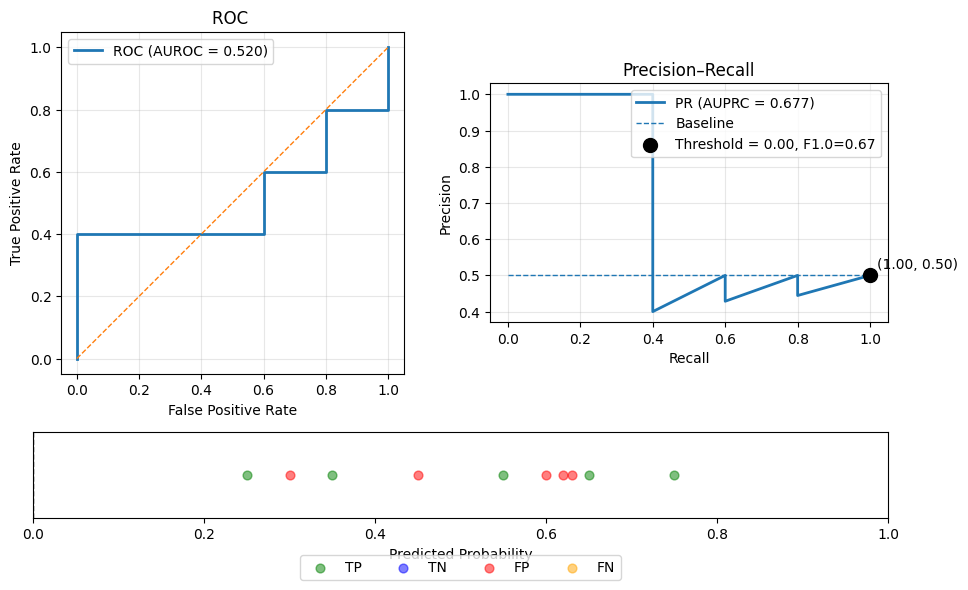

In [15]:
y_true_4 = np.array([0]*5 + [1]*5)
probs_4 = np.array([0.45, 0.63, 0.6, 0.3, 0.62, 0.35, 0.65, 0.25, 0.55, 0.75])

# Default F1 threshold
plot_roc(probs_4, y_true_4, show_probabilities=True, show_pr_curve=True);

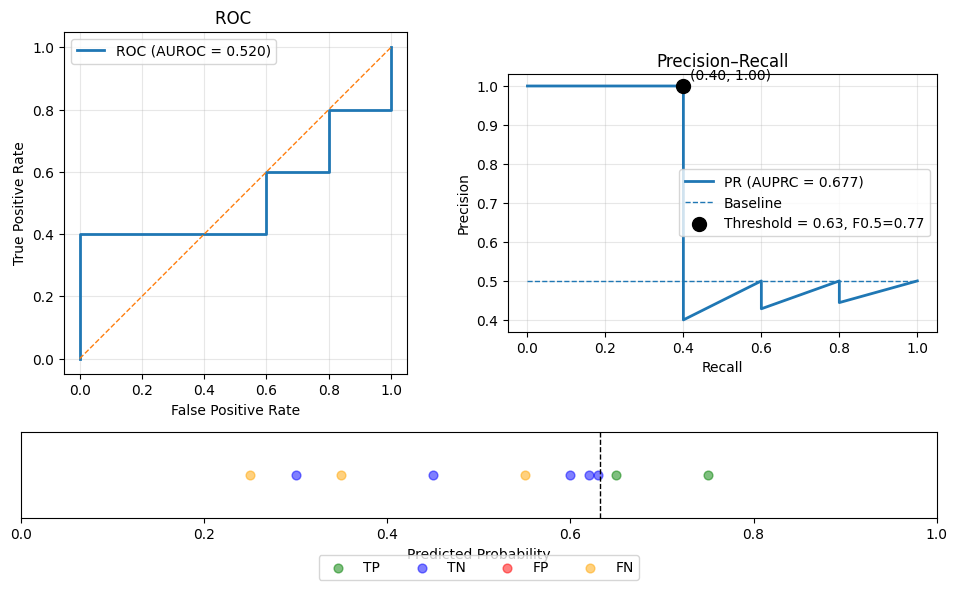

In [16]:
# Precision-favoring threshold (F0.5)
plot_roc(probs_4, y_true_4, show_probabilities=True, show_pr_curve=True, threshold=None, beta=0.5);

### Example 5 — Hard to separate (β < 1 favors **precision** vs β > 1 favors **recall**)

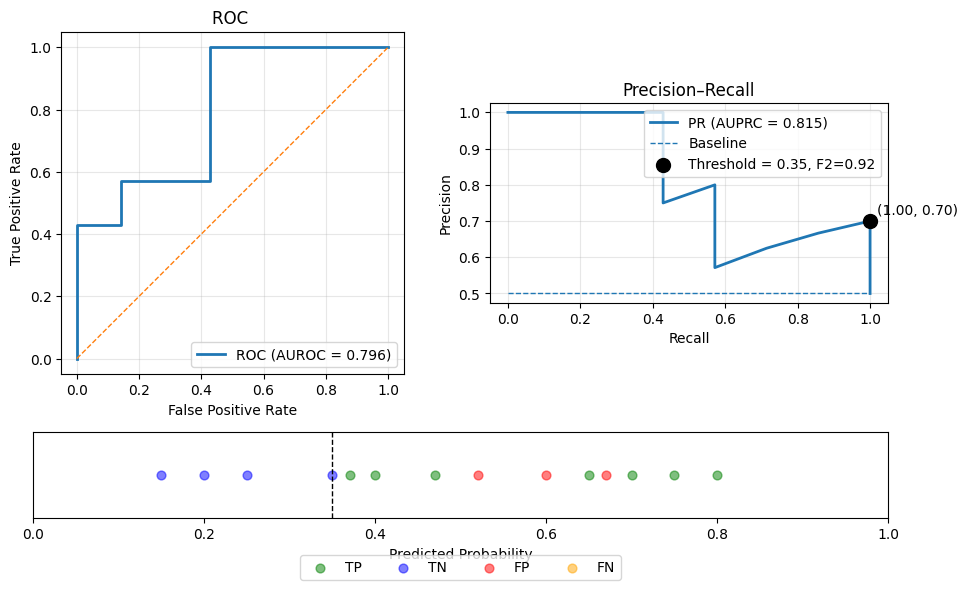

In [17]:
y_true_5 = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])
probs_5 = np.array([0.15, 0.2, 0.25, 0.35, 0.52, 0.6, 0.67, 0.37, 0.4, 0.47, 0.65, 0.7, 0.75, 0.8])

# Recall-favoring threshold (F2) (reduce false negatives)
plot_roc(probs_5, y_true_5, show_probabilities=True, show_pr_curve=True, beta=2);

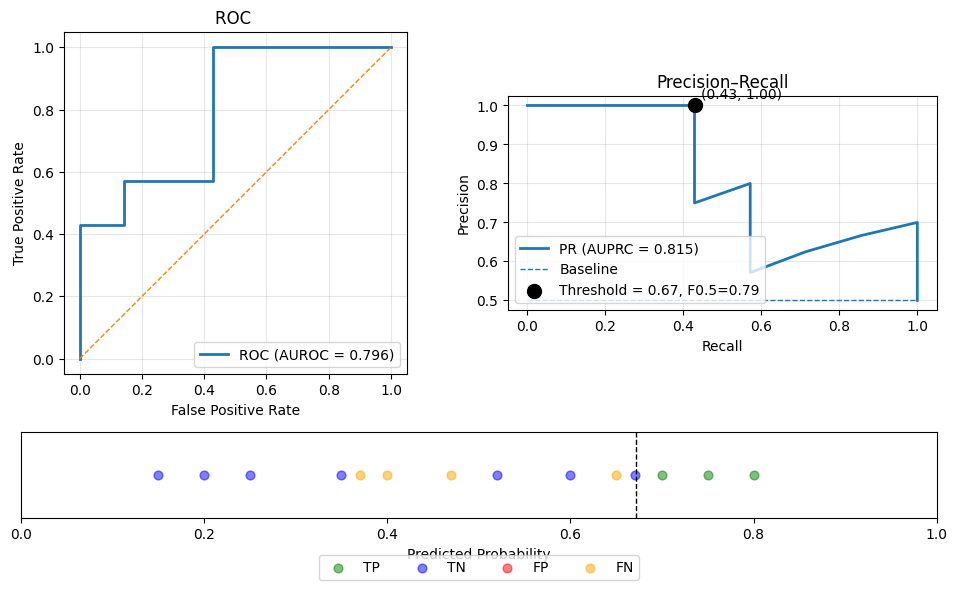

In [18]:
# Precision-favoring threshold (F0.5) (reduce false positives)
plot_roc(probs_5, y_true_5, show_probabilities=True, show_pr_curve=True, beta=0.5);

### Real Data Example

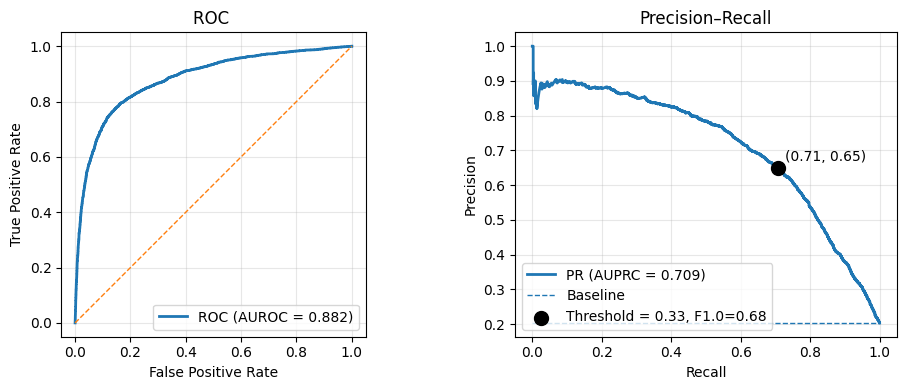

In [19]:
import joblib
import pandas as pd
import numpy as np
from mlpeople.io.google_drive import download_file_iss

# download files from google drive
download_file_iss('1Xz-cqp6y-Y_oCiaSJeNsbU3-o5lM-5wY', output_path='./downloads/train.csv')

# read data
raw_df = pd.read_csv('downloads/train.csv')

# read model
model_2 = joblib.load("models/log_reg.joblib")

# extract all details from model
input_cols = model_2['input_cols']
target_col = model_2['target_col']
numeric_cols = model_2['numeric_cols']
imputer = model_2['imputer']
scaler = model_2['scaler']
encoder = model_2['encoder']
categorical_cols= model_2['categorical_cols']
encoded_cols = model_2['encoded_cols']
model = model_2['model']

inputs = raw_df[input_cols].copy()
targets = raw_df[target_col].copy()

# impute
inputs[numeric_cols] = imputer.transform(inputs[numeric_cols])

# scale
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

# one hot encode
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

# predict
X = inputs[numeric_cols + encoded_cols]
pred_probs = model.predict_proba(X)[:, 1]

# plot roc
plot_roc(pred_probs, targets, show_probabilities=False, show_pr_curve=True);

#### Compare with threshold 0.5

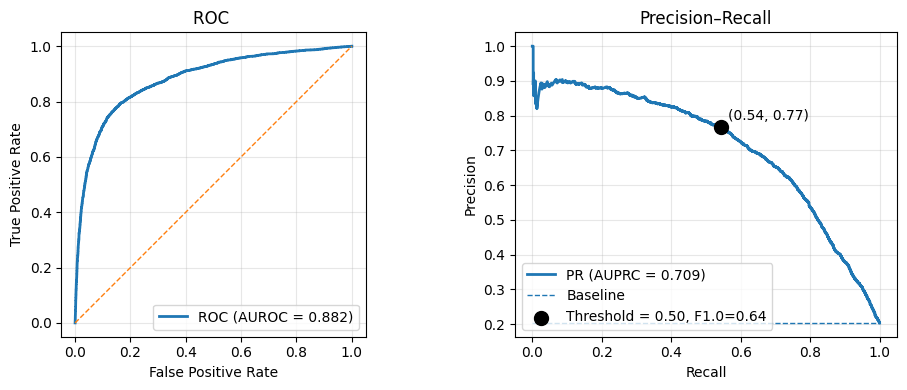

In [20]:
plot_roc(pred_probs, targets, show_probabilities=False, show_pr_curve=True, threshold=0.5);

#### Use sample for better probabilities view

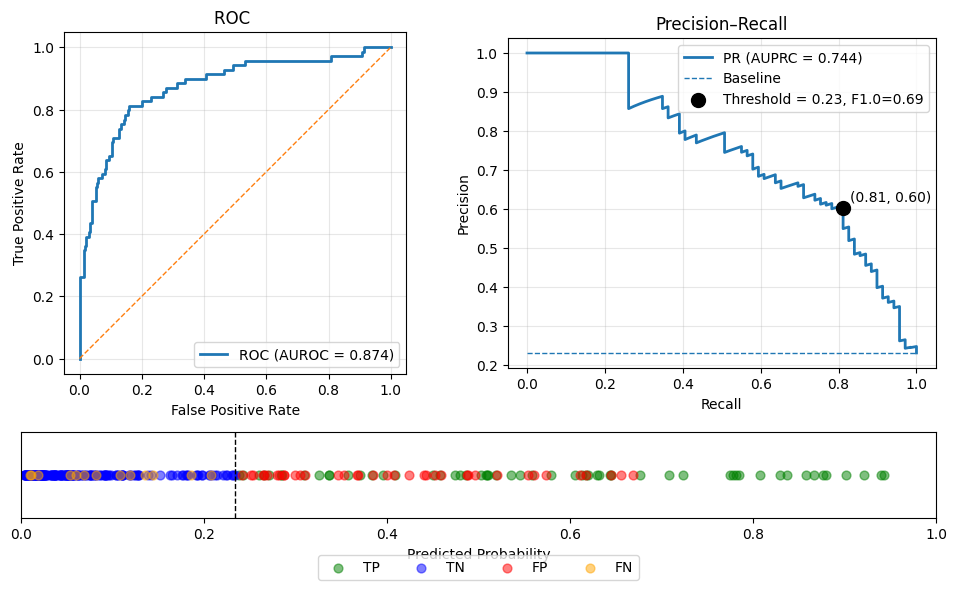

In [21]:
def sample_predictions(pred_probs, targets, n=200, random_state=42):
    rng = np.random.default_rng(random_state)

    n = min(n, len(pred_probs))  # avoid oversampling
    idx = rng.choice(len(pred_probs), size=n, replace=False)

    return pred_probs[idx], targets[idx]

sample_probs, sample_targets = sample_predictions(pred_probs, targets, n=300)

plot_roc(
    sample_probs,
    sample_targets,
    show_probabilities=True,
    show_pr_curve=True,
);

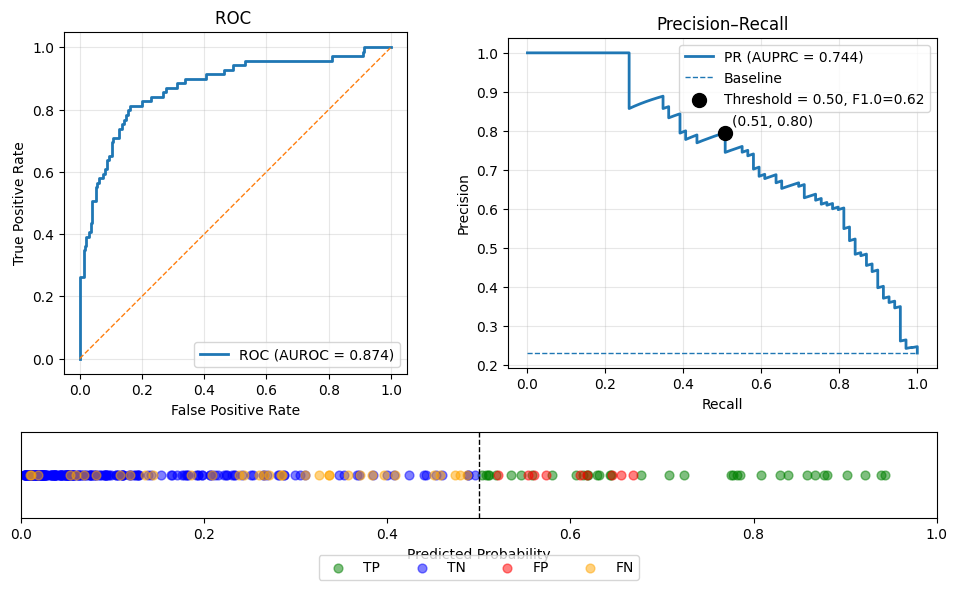

In [22]:
# compare with threshold 0.5
plot_roc(
    sample_probs,
    sample_targets,
    show_probabilities=True,
    show_pr_curve=True,
    threshold=0.5
);